## 이미지 전처리

### (1) Binarization & Skeletonization

In [1]:
import os
import numpy as np
import cv2
from os.path import join
from glob import glob
import matplotlib.pyplot as plt
import skimage
import time
import math
from PIL import Image
from tqdm.notebook import tqdm

In [2]:
img1 = Image.open('train\\train_ref\\1.BMP').convert('L')
img1 = np.array(img1)

In [3]:
################## PREPROCESSING UTILS ###################
import cv2
import numpy as np
from skimage.morphology import skeletonize as skelt

# Skeletonization
def skeletonize(image_input):
    """
    Skeletonization reduces binary objects to 1 pixel wide representations.
    skeletonize works by making successive passes of the image. On each pass, border pixels are identified
    and removed on the condition that they do not break the connectivity of the corresponding object.
    """
    image = np.zeros_like(image_input)
    image[image_input == 0] = 1.0
    output = np.zeros_like(image_input)
    skeleton = skelt(image)
    output[skeleton] = 255
    cv2.bitwise_not(output, output)
    return output

# Use Kernel for enhancing skeletonized results
def enhance_skelt(img, ks=3):
    ks = 3
    # kernel = np.ones((ks, ks)) / (ks*ks)
    kernel = np.array((
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1]
    ))
    print(kernel)
    
    rows, cols = img.shape[:2]
    print(rows, cols)
    img_filtered = np.zeros(img.shape, dtype=np.uint8)
    
    for i in tqdm(range(1,rows-1)):
            for j in range(1,cols-1):
                # block = img[i-1:i+2,j-1:j+2]
                result = 0
                for k_i in range(0, len(kernel)):
                    for k_j in range(0, len(kernel[0])):
                        # result += img[i, j] * kernel[k_i, k_j]  # correlation
                        result += img[i-ks//2+k_i, j-ks//2+k_j] * kernel[(len(kernel)-1)-k_i, (len(kernel)-1)-k_j]  # convolution
                img_filtered[i, j] = int(result) if result > 0 else 0
    
    print(img.max(), img_filtered.max())
    
    plt.imshow(cv2.cvtColor(img_filtered, cv2.COLOR_GRAY2RGB))
    
    return img_filtered


[[-1  0  1]
 [-1  0  1]
 [-1  0  1]]
256 256


  0%|          | 0/254 [00:00<?, ?it/s]

C:\Users\hjk\AppData\Local\Temp/ipykernel_21900/1489546738.py:23: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 266 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  img_filtered[i, j] = int(result) if result > 0 else 0
C:\Users\hjk\AppData\Local\Temp/ipykernel_21900/1489546738.py:23: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 296 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  img_filtered[i, j] = int(result) if result > 0 else 0
C:\Users\hjk\AppData\Local\Temp/ipykernel_21900/1489546738.py:23: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 274 

255 255


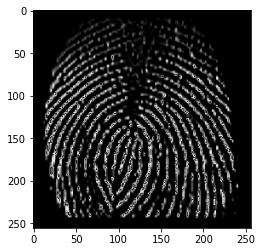

In [4]:
# 1. READ IMAGE
ks = 3
# kernel = np.ones((ks, ks)) / (ks*ks)
kernel = np.array((
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
))
print(kernel)

rows, cols = img1.shape[:2]
print(rows, cols)
img_filtered = np.zeros(img1.shape, dtype=np.uint8)

for i in tqdm(range(1,rows-1)):
        for j in range(1,cols-1):
            # block = img[i-1:i+2,j-1:j+2]
            result = 0
            for k_i in range(0, len(kernel)):
                for k_j in range(0, len(kernel[0])):
                    # result += img1[i, j] * kernel[k_i, k_j]  # correlation
                    result += img1[i-ks//2+k_i, j-ks//2+k_j] * kernel[(len(kernel)-1)-k_i, (len(kernel)-1)-k_j]  # convolution
            img_filtered[i, j] = int(result) if result > 0 else 0

print(img1.max(), img_filtered.max())

plt.imshow(cv2.cvtColor(img_filtered, cv2.COLOR_GRAY2RGB))

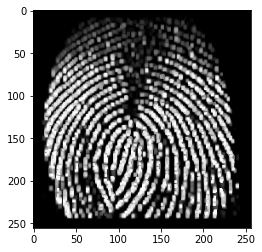

In [5]:
# 2. MORP and DILATE
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
dst = cv2.dilate(img_filtered, kernel)

plt.imshow(dst, cmap='gray')

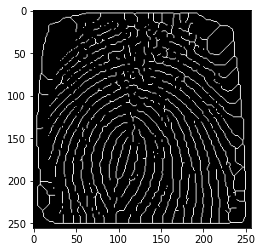

In [6]:
# 3. SKELETONIZE
skel = skeletonize(dst)
skel = 255 - skel
plt.imshow(skel, cmap='gray')

[[0 0 1]
 [0 0 1]
 [0 0 1]]
256 256


  0%|          | 0/254 [00:00<?, ?it/s]

C:\Users\hjk\AppData\Local\Temp/ipykernel_21900/565597312.py:44: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 510 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  img_filtered[i, j] = int(result) if result > 0 else 0
C:\Users\hjk\AppData\Local\Temp/ipykernel_21900/565597312.py:44: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 765 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  img_filtered[i, j] = int(result) if result > 0 else 0


255 255


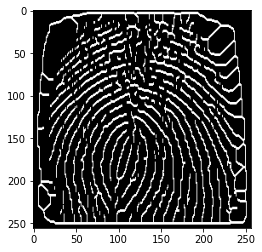

In [7]:
# 4. (maybe) ENHANCE SKELT
e_skel = enhance_skelt(skel)

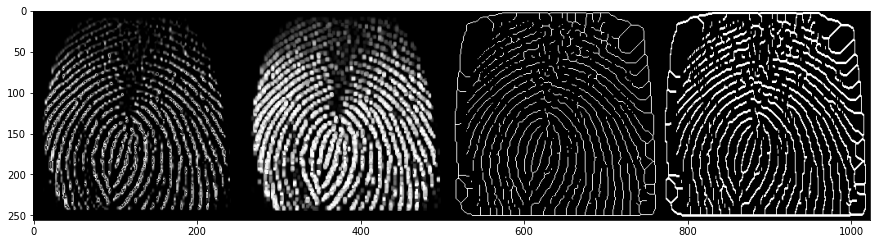

In [8]:
# plot all together
merged = np.hstack((img_filtered, dst, skel, e_skel))
plt.figure(figsize=(15, 17))
plt.imshow(merged, cmap='gray')

## 특징 추출

In [12]:
############### FEATURE EXTRACTION #################
import cv2
import numpy as np
import skimage.morphology
from skimage.morphology import convex_hull_image, erosion
from skimage.morphology import square
import math

class MinutiaeFeature(object):
  def __init__(self, locX, locY, Orientation, Type):
    self.locX = locX
    self.locY = locY
    self.Orientation = Orientation
    self.Type = Type

class FingerprintFeatureExtractor(object):
  def __init__(self):
    self._mask = []
    self._skel = []
    self.minutiaeTerm = []
    self.minutiaeBif = []

  def __skeletonize(self, img):
    img = np.uint8(img > 128)
    # self._skel = skimage.morphology.skeletonize(img)
    self._skel = np.uint8(img) * 255
    self._mask = img * 255

  def __computeAngle(self, block, minutiaeType):
    angle = []
    (blkRows, blkCols) = np.shape(block)
    CenterX, CenterY = (blkRows - 1) / 2, (blkCols - 1) / 2
    if (minutiaeType.lower() == 'termination'):
        sumVal = 0
        for i in range(blkRows):
            for j in range(blkCols):
                if ((i == 0 or i == blkRows - 1 or j == 0 or j == blkCols - 1) and block[i][j] != 0):
                    angle.append(-math.degrees(math.atan2(i - CenterY, j - CenterX)))
                    sumVal += 1
                    if (sumVal > 1):
                        angle.append(float('nan'))
        return (angle)

    elif (minutiaeType.lower() == 'bifurcation'):
        (blkRows, blkCols) = np.shape(block)
        CenterX, CenterY = (blkRows - 1) / 2, (blkCols - 1) / 2
        angle = []
        sumVal = 0
        for i in range(blkRows):
            for j in range(blkCols):
                if ((i == 0 or i == blkRows - 1 or j == 0 or j == blkCols - 1) and block[i][j] != 0):
                    angle.append(-math.degrees(math.atan2(i - CenterY, j - CenterX)))
                    sumVal += 1
        if (sumVal != 3):
            angle.append(float('nan'))
        return (angle)

  def __getTerminationBifurcation(self, img):
    self._skel = self._skel == 255
    (rows, cols) = self._skel.shape
    self.minutiaeTerm = np.zeros(self._skel.shape)
    self.minutiaeBif = np.zeros(self._skel.shape)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            if (self._skel[i][j] == 1):
                block = self._skel[i - 1:i + 2, j - 1:j + 2]
                block_val = np.sum(block)
                if (block_val == 2):
                    self.minutiaeTerm[i, j] = 1
                elif (block_val == 4):
                    self.minutiaeBif[i, j] = 1

    self._mask = convex_hull_image(self._mask > 0)
    self._mask = erosion(self._mask, square(5))  # Structuing element for mask erosion = square(5)
    self.minutiaeTerm = np.uint8(self._mask) * self.minutiaeTerm

  def __removeSpuriousMinutiae(self, minutiaeList, img, thresh):
    img = img * 0
    SpuriousMin = []
    real_dist = []
    numPoints = len(minutiaeList)
    D = np.zeros((numPoints, numPoints))
    for i in range(1,numPoints):
        for j in range(0, i):
            (X1,Y1) = minutiaeList[i]['centroid']
            (X2,Y2) = minutiaeList[j]['centroid']

            dist = np.sqrt((X2-X1)**2 + (Y2-Y1)**2)
            D[i][j] = dist
            if(dist < thresh): # threshold이하면 제외
                SpuriousMin.append(i)
                SpuriousMin.append(j)
            else:
              real_dist.append(dist)

    SpuriousMin = np.unique(SpuriousMin) 
    for i in range(0,numPoints):
        if(not i in SpuriousMin):
            (X,Y) = np.int16(minutiaeList[i]['centroid']) # 제외하지 않을 애들을 X, Y 값으로 불러오기
            print(X, Y)
            img[X,Y] = 1
    print(real_dist)
    img = np.uint8(img)
    return(img)

  def __cleanMinutiae(self, img):
    self.minutiaeTerm = skimage.measure.label(self.minutiaeTerm, connectivity=2)
    RP = skimage.measure.regionprops(self.minutiaeTerm)
    self.minutiaeTerm = self.__removeSpuriousMinutiae(RP, np.uint8(img), 10)

  def __performFeatureExtraction(self):
    FeaturesTerm = []
    self.minutiaeTerm = skimage.measure.label(self.minutiaeTerm, connectivity=2)
    RP = skimage.measure.regionprops(np.uint8(self.minutiaeTerm))

    WindowSize = 2  # --> For Termination, the block size must can be 3x3, or 5x5. Hence the window selected is 1 or 2
    FeaturesTerm = []
    for num, i in enumerate(RP):
        # print(num)
        (row, col) = np.int16(np.round(i['Centroid']))
        block = self._skel[row - WindowSize:row + WindowSize + 1, col - WindowSize:col + WindowSize + 1]
        angle = self.__computeAngle(block, 'Termination')
        if(len(angle) == 1):
            FeaturesTerm.append(MinutiaeFeature(row, col, angle, 'Termination'))
    term_cnt = num
    FeaturesBif = []
    min_cnt = 0
    self.minutiaeBif = skimage.measure.label(self.minutiaeBif, connectivity=2)
    RP = skimage.measure.regionprops(np.uint8(self.minutiaeBif))
    WindowSize = 1  # --> For Bifurcation, the block size must be 3x3. Hence the window selected is 1
    for i in RP:
        (row, col) = np.int16(np.round(i['Centroid']))
        block = self._skel[row - WindowSize:row + WindowSize + 1, col - WindowSize:col + WindowSize + 1]
        angle = self.__computeAngle(block, 'Bifurcation')
        # print('bif:', (row, col))
        if(len(angle) == 3):
            FeaturesBif.append(MinutiaeFeature(row, col, angle, 'Bifurcation'))
        min_cnt += 1
    return (FeaturesTerm, FeaturesBif, term_cnt, min_cnt)

  def extractMinutiaeFeatures(self, img):
    self.__skeletonize(img)

    self.__getTerminationBifurcation(img)

    self.__cleanMinutiae(img)

    FeaturesTerm, FeaturesBif, term_cnt, min_cnt = self.__performFeatureExtraction()
    return(FeaturesTerm, FeaturesBif, term_cnt, min_cnt)

  def showResults(self):
    BifLabel = skimage.measure.label(self.minutiaeBif, connectivity=2)
    TermLabel = skimage.measure.label(self.minutiaeTerm, connectivity=2)

    minutiaeBif = TermLabel * 0
    minutiaeTerm = BifLabel * 0

    (rows, cols) = self._skel.shape
    DispImg = np.zeros((rows, cols, 3), np.uint8)
    DispImg[:, :, 0] = 255*self._skel
    DispImg[:, :, 1] = 255*self._skel
    DispImg[:, :, 2] = 255*self._skel

    RP = skimage.measure.regionprops(BifLabel)
    for idx, i in enumerate(RP):
        (row, col) = np.int16(np.round(i['Centroid']))
        minutiaeBif[row, col] = 1
        (rr, cc) = skimage.draw.circle_perimeter(row, col, 3)
        skimage.draw.set_color(DispImg, (rr, cc), (255, 0, 0))

    RP = skimage.measure.regionprops(TermLabel)
    for idx, i in enumerate(RP):
        (row, col) = np.int16(np.round(i['Centroid']))
        minutiaeTerm[row, col] = 1
        (rr, cc) = skimage.draw.circle_perimeter(row, col, 3)
        skimage.draw.set_color(DispImg, (rr, cc), (0, 0, 255))

    # cv2.waitKey(0)
    plt.figure(figsize=(6,6))
    plt.imshow(DispImg, cmap='gray')

    # plt.plot(DispImg)
    # plt.show()

def extract_minutiae_features(img, showResult=False):
  feature_extractor = FingerprintFeatureExtractor()
  FeaturesTerm, FeaturesBif, term_cnt, min_cnt = feature_extractor.extractMinutiaeFeatures(img)

  if(True):
      feature_extractor.showResults()

  return(FeaturesTerm, FeaturesBif, term_cnt, min_cnt)

9 135
53 82
99 17
138 11
174 129
179 177
199 90
231 95
232 238
235 226
[60.03332407921454, 27.073972741361768, 33.0, 13.601470508735444, 47.042533945356304, 14.142135623730951, 64.69350817508662, 37.61980861195336, 51.509707822894896, 38.3275357934736, 98.04590761474952, 65.06919393998976, 51.0098029794274, 102.5, 44.28317965096906, 104.04326023342406, 71.06335201775947, 57.0087712549569, 108.5, 74.24284477308234, 14.560219778561036, 47.16990566028302, 61.032778078668514, 112.0044641967453, 118.00423721205946, 47.877447718106275, 13.124404748406688, 20.886598574205422, 34.55792239125495, 17.029386365926403, 85.5058477532385, 91.50546431771166, 26.5, 36.49657518178932, 24.331050121192877, 23.08679276123039, 28.5175384631984, 74.00675644831355, 80.00624975587844, 38.0, 11.5, 52.3450093132096, 112.0714058089752, 79.1012010022604, 65.03076195155643, 116.50429176644094, 14.035668847618199, 126.0, 99.5, 88.0, 17.88854381999832, 44.40720662234904, 12.529964086141668, 48.59269492423733, 54.083

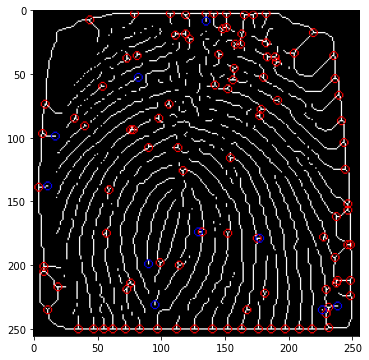

In [13]:
FeaturesTerminations, FeaturesBifurcations, term_cnt, min_cnt = extract_minutiae_features(img=skel, showResult=True)

In [14]:
print('term_cnt:', term_cnt)
print('minutiae_cnt:', min_cnt)

term_cnt: 9
minutiae_cnt: 102


Minutiae Matching Algorithm

In [15]:
import math

class Minutiae:
    def __init__(self, x, y, angle):
        self.x = x
        self.y = y
        self.angle = angle

    def __repr__(self):
        return f'Minutiae(x={self.x}, y={self.y}, angle={self.angle})'

def euclidean_distance(point1, point2):
    return math.sqrt((point1.x - point2.x) ** 2 + (point1.y - point2.y) ** 2)

def angular_distance(angle1, angle2):
    return min(abs(angle1 - angle2), 360 - abs(angle1 - angle2))

def minutiae_distance(minutiae1, minutiae2, spatial_threshold=15, angular_threshold=10):
    spatial_dist = euclidean_distance(minutiae1, minutiae2)
    angular_dist = angular_distance(minutiae1.angle, minutiae2.angle)
    return spatial_dist < spatial_threshold and angular_dist < angular_threshold

def match_minutiae(minutiae_list1, minutiae_list2, spatial_threshold=15, angular_threshold=10):
    matched_pairs = []
    for m1 in minutiae_list1:
        for m2 in minutiae_list2:
            if minutiae_distance(m1, m2, spatial_threshold, angular_threshold):
                matched_pairs.append((m1, m2))
                break  # Assuming each minutiae in list1 matches with at most one in list2
    return matched_pairs

def calculate_similarity_score(matched_pairs, total_minutiae):
    return len(matched_pairs) / total_minutiae


In [16]:
# Add to class Minutiae
Minutiae_input = []
for idx, curr_minutiae in enumerate(FeaturesBifurcations):
    row, col = curr_minutiae.locX, curr_minutiae.locY, 
    orientation, type = curr_minutiae.Orientation, curr_minutiae.Type
    print(row, col, orientation[0])
    Minutiae_input.append(Minutiae(row, col, orientation[0]))
for idx, curr_minutiae in enumerate(FeaturesTerminations):
    row, col = curr_minutiae.locX, curr_minutiae.locY, 
    orientation, type = curr_minutiae.Orientation, curr_minutiae.Type
    print(row, col, float(orientation[0]))
    Minutiae_input.append(Minutiae(row, col, orientation[0]))

3 79 -180.0
3 107 -180.0
3 135 -180.0
3 141 -180.0
3 151 -180.0
3 182 -180.0
4 119 -180.0
4 165 135.0
4 172 45.0
8 44 45.0
14 151 90.0
15 148 45.0
18 219 90.0
19 119 90.0
20 111 90.0
19 163 135.0
23 122 135.0
27 162 90.0
27 158 135.0
35 145 90.0
34 204 45.0
36 81 90.0
36 235 90.0
37 183 90.0
38 73 90.0
37 189 45.0
41 190 90.0
46 157 135.0
53 180 90.0
54 236 90.0
55 156 90.0
59 142 90.0
60 54 135.0
62 152 90.0
67 239 90.0
71 191 45.0
74 9 45.0
74 106 90.0
78 178 90.0
83 177 90.0
85 32 45.0
85 98 90.0
87 241 90.0
91 40 90.0
94 76 45.0
94 78 135.0
97 7 90.0
104 243 90.0
108 90 90.0
108 113 90.0
116 154 135.0
125 244 90.0
126 117 45.0
139 4 90.0
141 59 135.0
152 246 45.0
157 246 90.0
162 237 90.0
174 132 90.0
175 57 90.0
175 152 135.0
178 227 45.0
179 175 135.0
184 248 90.0
184 246 135.0
194 236 45.0
198 99 135.0
201 8 90.0
200 114 135.0
205 8 90.0
212 248 90.0
212 238 -180.0
214 76 90.0
214 237 90.0
217 19 -180.0
219 73 90.0
219 229 90.0
222 181 135.0
224 248 90.0
233 231 -180.0
235 167 9

In [17]:
minutiae_list1 = Minutiae_input

In [18]:
minutiae_list2 = Minutiae_input

In [19]:
# get minutiae matching results

matched_pairs = match_minutiae(minutiae_list1, minutiae_list2)
similarity_score = calculate_similarity_score(matched_pairs, max(len(minutiae_list1), len(minutiae_list2)))

print(f'Matched Pairs: {matched_pairs}')
print(f'Similarity Score: {similarity_score:.2f}')

Matched Pairs: [(Minutiae(x=3, y=79, angle=-180.0), Minutiae(x=3, y=79, angle=-180.0)), (Minutiae(x=3, y=107, angle=-180.0), Minutiae(x=3, y=107, angle=-180.0)), (Minutiae(x=3, y=135, angle=-180.0), Minutiae(x=3, y=135, angle=-180.0)), (Minutiae(x=3, y=141, angle=-180.0), Minutiae(x=3, y=135, angle=-180.0)), (Minutiae(x=3, y=151, angle=-180.0), Minutiae(x=3, y=141, angle=-180.0)), (Minutiae(x=3, y=182, angle=-180.0), Minutiae(x=3, y=182, angle=-180.0)), (Minutiae(x=4, y=119, angle=-180.0), Minutiae(x=3, y=107, angle=-180.0)), (Minutiae(x=4, y=165, angle=135.0), Minutiae(x=4, y=165, angle=135.0)), (Minutiae(x=4, y=172, angle=45.0), Minutiae(x=4, y=172, angle=45.0)), (Minutiae(x=8, y=44, angle=45.0), Minutiae(x=8, y=44, angle=45.0)), (Minutiae(x=14, y=151, angle=90.0), Minutiae(x=14, y=151, angle=90.0)), (Minutiae(x=15, y=148, angle=45.0), Minutiae(x=15, y=148, angle=45.0)), (Minutiae(x=18, y=219, angle=90.0), Minutiae(x=18, y=219, angle=90.0)), (Minutiae(x=19, y=119, angle=90.0), Minuti

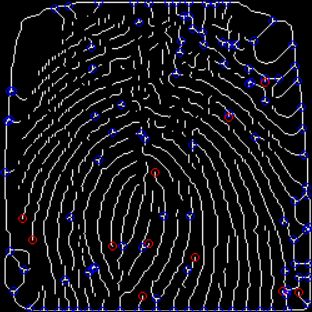

## 매칭

477 1428
test2/test2\100_type1.BMP 100 train/train_ref\100.BMP


Text(0.5, 1.0, 'Sample Test Image')

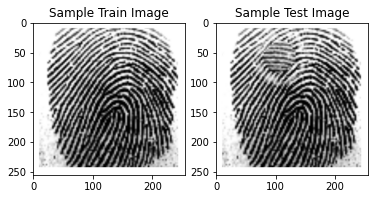

In [20]:
############# MATCHING ################
# 1. import train/test images
train_path = 'train/train_ref'
test2_path = 'test2/test2'

list_train = sorted(glob(join(train_path, '*.BMP')))
list_test2 = sorted(glob(join(test2_path, '*.BMP')))
print(len(list_train), len(list_test2))

# 2. test print train/test images
target_path = list_test2[0]
basename = os.path.basename(target_path).split('_')[0]
train_sample_path = join(train_path, basename + '.BMP')
print(target_path, basename, train_sample_path)
img_train = cv2.imread(train_sample_path)
img_test = cv2.imread(target_path)

plt.subplot(1,2,1)
plt.imshow(img_train, cmap='gray')
plt.title('Sample Train Image')
plt.subplot(1,2,2)
plt.imshow(img_test, cmap='gray')
plt.title('Sample Test Image')

Helper Functions

In [21]:
def read_and_preprocess(img):
    # 1. READ IMAGE
    ks = 3
    # kernel = np.ones((ks, ks)) / (ks*ks)
    kernel = np.array((
        [-1, 0, 1],
        [-1, 0, 1],
        [-1, 0, 1]
    ))
    print(kernel)

    rows, cols = img1.shape[:2]
    print(rows, cols)
    img_filtered = np.zeros(img1.shape, dtype=np.uint8)

    for i in tqdm(range(1,rows-1)):
            for j in range(1,cols-1):
                # block = img[i-1:i+2,j-1:j+2]
                result = 0
                for k_i in range(0, len(kernel)):
                    for k_j in range(0, len(kernel[0])):
                        # result += img1[i, j] * kernel[k_i, k_j]  # correlation
                        result += img1[i-ks//2+k_i, j-ks//2+k_j] * kernel[(len(kernel)-1)-k_i, (len(kernel)-1)-k_j]  # convolution
                img_filtered[i, j] = int(result) if result > 0 else 0

    print(img1.max(), img_filtered.max())

    kernel2 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    dst = cv2.dilate(img_filtered, kernel2)

    skel = skeletonize(dst)
    skel = 255 - skel

    return skel

def feat_extraction(img):
    FeaturesTerminations, FeaturesBifurcations, term_cnt, min_cnt = extract_minutiae_features(img=img, showResult=True)
    # Add to class Minutiae
    Minutiae_input = []
    for idx, curr_minutiae in enumerate(FeaturesBifurcations):
        row, col = curr_minutiae.locX, curr_minutiae.locY, 
        orientation, type = curr_minutiae.Orientation, curr_minutiae.Type
        print(row, col, orientation[0])
        Minutiae_input.append(Minutiae(row, col, orientation[0]))
    for idx, curr_minutiae in enumerate(FeaturesTerminations):
        row, col = curr_minutiae.locX, curr_minutiae.locY, 
        orientation, type = curr_minutiae.Orientation, curr_minutiae.Type
        print(row, col, float(orientation[0]))
        Minutiae_input.append(Minutiae(row, col, orientation[0]))

    return Minutiae_input

def calculate_similarity(minutiae_list1, minutiae_list2):
    matched_pairs = match_minutiae(minutiae_list1, minutiae_list2)
    similarity_score = calculate_similarity_score(matched_pairs, max(len(minutiae_list1), len(minutiae_list2)))

    print(f'Matched Pairs: {matched_pairs}')
    print(f'Similarity Score: {similarity_score:.2f}')

    return similarity_score

Main

In [ ]:
results = []
matches = []
answer = []
for i in list_test2:
    print("Fingerprint matching on:", i)
    test_num = i.split('_')[-2]
    test_num = test_num.split('test2')[-1]
    test_num = test_num[1:]
    answer.append(test_num)
    temp_sim = 0
    for j in list_train:
        train_num = i.split('.BMP')[-2]
        train_num = train_num.split('ref')[-1]
        train_num = train_num[1:]
        train_num = j.split('.BMP')[-1]
        img1 = Image.open(i).convert('L')
        img1 = np.array(img1)
        img2 = Image.open(j).convert('L')
        img2 = np.array(img2)

        input1 = read_and_preprocess(img1)
        input2 = read_and_preprocess(img2)

        input1_minutiae = feat_extraction(input1)
        input2_minutiae = feat_extraction(input2)

        sim = calculate_similarity(input1_minutiae, input2_minutiae)
        if sim > temp_sim:
            best = train_num
        print("best similarity:", best)
    if best == 'test_num':
        matches.append(best)

Fingerprint matching on: test2/test2\100_type1.BMP
100
Fingerprint matching on: test2/test2\100_type2.BMP
100
Fingerprint matching on: test2/test2\100_type3.BMP
100
Fingerprint matching on: test2/test2\101_type1.BMP
101
Fingerprint matching on: test2/test2\101_type2.BMP
101
Fingerprint matching on: test2/test2\101_type3.BMP
101
Fingerprint matching on: test2/test2\102_type1.BMP
102
Fingerprint matching on: test2/test2\102_type2.BMP
102
Fingerprint matching on: test2/test2\102_type3.BMP
102
Fingerprint matching on: test2/test2\104_type1.BMP
104
Fingerprint matching on: test2/test2\104_type2.BMP
104
Fingerprint matching on: test2/test2\104_type3.BMP
104
Fingerprint matching on: test2/test2\105_type1.BMP
105
Fingerprint matching on: test2/test2\105_type2.BMP
105
Fingerprint matching on: test2/test2\105_type3.BMP
105
Fingerprint matching on: test2/test2\106_type1.BMP
106
Fingerprint matching on: test2/test2\106_type2.BMP
106
Fingerprint matching on: test2/test2\106_type3.BMP
106
Fingerprin

: 

In [ ]:
import os
results = []
for i in list_train:
    print("Fingerprint matching on:", i)
    train_path = i
    train_num = train_path.split('.')[-2]
    for j in range(1, 4):
        test_path = os.path.join(test2_path, f"{train_num}_type{j}.BMP")
        # matching 진행
        img1 = Image.open().convert('L')
        img1 = np.array(img1)
        img2 = Image.open('train\\train_ref\\1.BMP').convert('L')
        img2 = np.array(img2)
        print(train_path, test_path)
        best = None
    result.append([train_num, best])

## Metric 계산

In [ ]:
# 정답 list와 실제 prediction 결과 list를 가지고 precision, recall, accuracy 계산
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(matches, answer)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(matches, answer)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(matches, answer)
print("Recall (Sensitivity):", recall)